In [93]:
import pandas as pd
from scipy.stats import chisquare, ttest_ind, shapiro
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [76]:
plt.style.use('ggplot')

In [5]:
data = pd.read_excel('Výsledky dotazníků.xlsx', sheet_name='body')
data.head()

,povolani,Dotatník,č. 1,č. 2,č. 3,č. 4,č. 5,č. 5a - předmět,č. 6/A,č. 6/B,...,č. 32/1,č. 32/2,č. 32/3,č. 32/4,č. 32/5,BODY,Pohlaví,věk,ročník,Unnamed: 54
0,Sociální činnost,1,a,a,-,Dospívání,a,př,X,NaN,...,1,1,0,1,0,33,M,16,1,NaN
1,Sociální činnost,2,a,a,-,těhotenství,a,př,NaN,X,...,1,0,0,1,0,22,Ž,16,1,NaN
2,Sociální činnost,3,a,n,Nezájem,-,a,vkz,NaN,X,...,1,1,1,0,0,39,M,16,1,NaN
3,Sociální činnost,4,a,n,-,-,a,-,X,NaN,...,0,1,1,1,0,29,Ž,17,1,NaN
4,Sociální činnost,5,a,a,-,Sex,a,-,NaN,X,...,1,1,0,1,1,25,Ž,16,1,NaN


In [6]:
muzi = data[data['Pohlaví'] == 'M']
zeny = data[data['Pohlaví'] == 'Ž']

muzi_body = muzi['BODY']
zeny_body = zeny['BODY']

In [7]:
# 1. chceme zjistit jestli zalezi na pohlavi podle poctu bodu - body na pohlavi
# 2. existuje zavislost mezi sebehodnocenim znalosti (ot. c. 9) a body
# 3. existuje zavislost mezi obor studia (povolani) a body

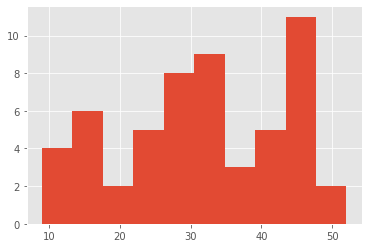

In [77]:
muzi_body.hist()
plt.show()

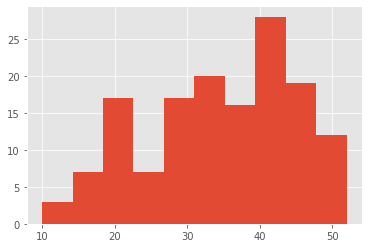

In [78]:
zeny_body.hist()
plt.show()

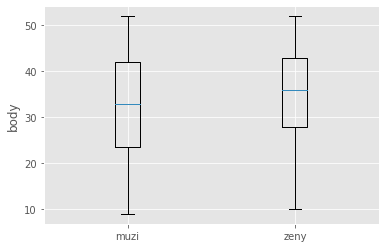

In [79]:
plt.boxplot([muzi_body, zeny_body])
plt.xticks([1, 2],['muzi', 'zeny'])
plt.ylabel('body')
plt.show()

In [30]:
shapiro(muzi_body), shapiro(zeny_body)

((0.9532239437103271, 0.031979963183403015),
 (0.9579218626022339, 0.0001973911712411791))

In [102]:
ttest_ind(muzi_body, zeny_body, equal_var=False)

Ttest_indResult(statistic=-1.6444617755279134, pvalue=0.10377226662965239)

In [57]:
display(muzi_body.describe(), 
        zeny_body.describe())

count    55.000000
mean     31.600000
std      11.869038
min       9.000000
25%      23.500000
50%      33.000000
75%      42.000000
max      52.000000
Name: BODY, dtype: float64

count    146.000000
mean      34.568493
std       10.089194
min       10.000000
25%       28.000000
50%       36.000000
75%       43.000000
max       52.000000
Name: BODY, dtype: float64

In [84]:
model = sm.OLS(data['BODY'], data['Pohlaví'].factorize()[0])
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   BODY   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              451.5
Date:                Sat, 19 Oct 2019   Prob (F-statistic):                    3.49e-53
Time:                        15:27:36   Log-Likelihood:                         -883.38
No. Observations:                 201   AIC:                                      1769.
Df Residuals:                     200   BIC:                                      1772.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            34.5685      1.627     21.248      0.000      31.360      37.777
==============================================================================
Omnibus:                       11.075   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.793
Skew:                           0.573   Prob(JB):                      0.00275
Kurtosis:                       2.689   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""